In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [3]:
# URL stable: https://www.data.gouv.fr/fr/datasets/forets-publiques-diffusion-publique-1/
url = "https://www.data.gouv.fr/fr/datasets/r/7b0811ee-9c02-435a-a2e8-440f6a4ffca7"  # Open data from Office National des Forêts

In [4]:
gdf = gpd.read_file(url)
gdf.head()

,iidtn_frt,llib_frt,cdom_frt,cinse_dep,geometry
0,F00001A,Forêt communale d'Ahun,NON,23,"POLYGON ((2.04109 46.07771, 2.04108 46.07769, ..."
1,F00002B,Forêt communale indivise de Barry-Barbouly Et A,NON,63,"POLYGON ((2.83332 46.08670, 2.83293 46.08653, ..."
2,F00003C,Forêt domaniale du Breuil,OUI,43,"POLYGON ((3.70994 45.32517, 3.70995 45.32513, ..."
3,F00005E,Forêt communale de Budelière,NON,23,"MULTIPOLYGON (((2.50500 46.23526, 2.50503 46.2..."
4,F00006F,Forêt sectionale de Châlons,NON,19,"POLYGON ((2.40005 45.63472, 2.40001 45.63458, ..."


In [5]:
gdf_2154 = gdf.to_crs(epsg=2154)  # Lambert-93
gdf_2154["surface"] = gdf_2154["geometry"].area

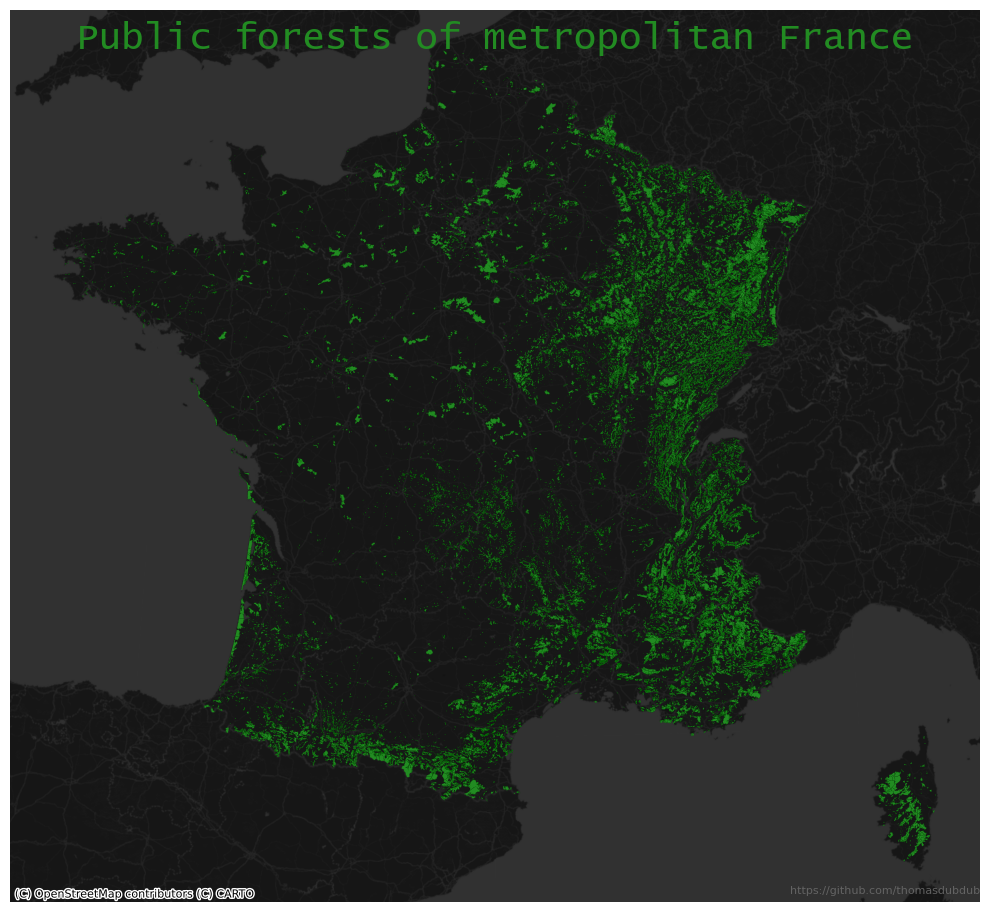

In [12]:
color = "forestgreen"
f, ax = plt.subplots(figsize=(10, 10))
gdf_2154.plot(ax=ax, color=color, edgecolor="darkgreen", linewidth=0.08)
ax.axis("off")
cx.add_basemap(
    ax,
    crs=gdf_2154.crs.to_string(),
    source=cx.providers.CartoDB.DarkMatterNoLabels,
    alpha=0.95,
)
plt.suptitle(
    "Public forests of metropolitan France",
    fontsize=27,
    y=0.91,
    color=color,
    fontname="Lucida Console",
)
plt.title(
    "https://github.com/thomasdubdub",
    fontsize=8,
    color="dimgrey",
    alpha=0.9,
    y=0.00,
    loc="right",
)
plt.tight_layout()
plt.savefig("forests.png", dpi=150, bbox_inches="tight", pad_inches=0)